In [14]:
!pip install nump

In [3]:
# NumPy 배열 연산 속도 - 실습

# 숫자가 담긴 리스트와 NumPy 배열을 준비. 
# 각 요소에 2를 곱하는 아주 간단한 연산의 속도를 측정.

import numpy as np
import time

# 1. 데이터 준비 
n = 100000000
py_list = list(range(n))
np_arr = np.arange(n)

# 2. Python 리스트 연산 시간 측정
start_time = time.time()
result_py = [x * 2 for x in py_list]
end_time = time.time()
py_time = end_time - start_time
print(f"Python 리스트 연산 시간: {py_time:.5f} 초")

# 3. NumPy 배열 연산 시간 측정
start_time = time.time()
result_np = np_arr * 2
end_time = time.time()
np_time = end_time - start_time
print(f"NumPy 배열 연산 시간:  {np_time:.5f} 초")


# NumPy가 압도적으로 빠름. 
# NumPy의 효율적인 메모리 구조와 C언어 기반 연산의 힘.


Python 리스트 연산 시간: 6.95357 초
NumPy 배열 연산 시간:  0.16920 초


In [5]:
# NumPy 브로드캐스팅 - 실습

# 다양한 시나리오를 통해 브로드캐스팅 규칙을 직접 확인.

import numpy as np

# 시나리오 1: 2D 배열과 1D 배열
# (3, 3) 배열과 (3,) 배열 연산 -> (3,)이 (1, 3)으로 확장 후 다시 (3, 3)으로 확장
arr2d = np.arange(9).reshape(3, 3)
arr1d = np.array([0, 1, 2])
print("--- 2D + 1D 연산 ---")
print(f"{arr2d.shape} + {arr1d.shape} =>\n{arr2d + arr1d}\n")

# 시나리오 2: 열 벡터와 행 벡터로 2D 그리드 생성
# (3, 1) 배열과 (3,) 배열 연산 -> (3, 1)과 (1, 3)으로 확장 후 둘 다 (3, 3)으로 확장
col_vec = np.arange(3).reshape(3, 1) # 열 벡터
row_vec = np.array([0, 10, 20])      # 행 벡터
result_grid = col_vec + row_vec
print("--- 열 벡터 + 행 벡터 연산 ---")
print(f"{col_vec.shape} + {row_vec.shape} => (3, 3)\n{result_grid}\n")


# for 루프를 중첩해야 만들 수 있는 2차원 결과물을 단 한 번의 덧셈으로 생성.


--- 2D + 1D 연산 ---
(3, 3) + (3,) =>
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]]

--- 열 벡터 + 행 벡터 연산 ---
(3, 1) + (3,) => (3, 3)
[[ 0 10 20]
 [ 1 11 21]
 [ 2 12 22]]



In [ ]:
# 인덱싱 - 실습

# 팬시 인덱싱과 불리언 마스킹을 조합하여 복잡한 조건의 데이터를 추출.

import numpy as np

X = np.arange(12).reshape(4, 3) # 4x3 모양의 배열
print(f"원본 배열 X (shape: {X.shape}):\n{X}\n")

# 1. 팬시 인덱싱: 2번, 0번 행을 선택하고, 그 안에서 1번, 2번 열만 선택
fancy_result = X[[2, 0]][:, [1, 2]]
print(f"--- 팬시 인덱싱 결과 ---\n{fancy_result}\n")

# 2. 불리언 마스킹: 짝수인 모든 값을 0으로 변경
X_modified = X.copy() # 원본 유지를 위해 복사
even_mask = (X_modified % 2 == 0)
X_modified[even_mask] = 0
print(f"--- 불리언 마스킹 결과 (짝수를 0으로) ---\n{X_modified}\n")


# 팬시 인덱싱으로 행과 열의 순서를 마음대로 바꾸고, 
# 불리언 마스킹으로 특정 조건의 값들을 한 번에 바꿀 수 있음.
# 데이터 전처리에 매우 강력한 기능.

In [10]:
!pip install scikit-image matplotlib

이미지 배열 형태: (300, 451, 3)
데이터 타입: uint8


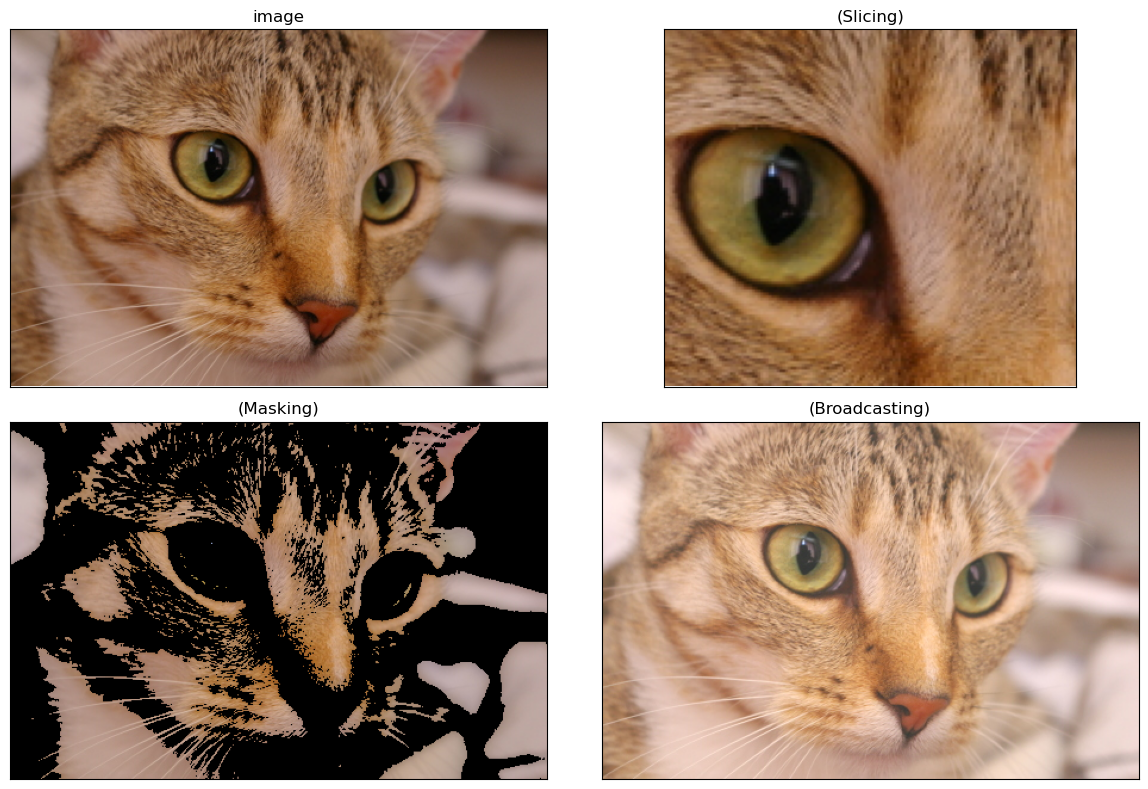

In [13]:
# 이미지 데이터를 NumPy 배열로 다루기 - 실습

# 컬러 이미지는 정확히 3차원 NumPy 배열(높이, 너비, 색상 채널)로 표현.
# 슬라이싱, 마스킹, 브로드캐스팅 기법이 이미지에 어떻게 적용되는지 보여주는 예제

import numpy as np
import matplotlib.pyplot as plt
from skimage import data # 예제 이미지를 불러오기 위한 라이브러리

# 1. 이미지 불러오기 및 정보 확인
# scikit-image에서 제공하는 고양이 예제 이미지를 사용합니다.
image = data.chelsea() # (300, 451, 3) 크기의 NumPy 배열
print(f"이미지 배열 형태: {image.shape}")
print(f"데이터 타입: {image.dtype}") # uint8 (0~255 정수)

# 2. 이미지 일부 잘라내기 (슬라이싱)
# 고양이 얼굴 부분만 잘라냅니다.
cat_face = image[50:180, 130:280]

# 3. 특정 색상 영역 추출하기 (불리언 마스킹)
# 이미지의 붉은색(Red) 채널 값이 160 이상인 영역만 남기기
red_mask = image[:, :, 0] > 160 # R 채널은 0번 인덱스
masked_image = image.copy()
# 3차원 마스크를 만들기 위해 마스크를 3번 쌓습니다
masked_image[~np.stack([red_mask]*3, axis=-1)] = 0 # 붉지 않은 영역은 검은색(0)

# 4. 이미지 밝기 조절 (브로드캐스팅)
# 배열 전체에 값을 더해 밝기를 올립니다.
bright_image = np.clip(image.astype(int) + 50, 0, 255).astype(np.uint8)


# --- 결과 시각화 ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].imshow(image)
axes[0, 0].set_title("image")
axes[0, 1].imshow(cat_face)
axes[0, 1].set_title("(Slicing)")
axes[1, 0].imshow(masked_image)
axes[1, 0].set_title("(Masking)")
axes[1, 1].imshow(bright_image)
axes[1, 1].set_title("(Broadcasting)")

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()
